A decision tree is a supervised machine learning algorithm that models decisions and their possible consequences in a hierarchical, flowchart-like structure. It uses a root node, branches, internal (or decision) nodes, and leaf (or terminal) nodes to make predictions for both classification (categorizing data) and regression (predicting numerical values) tasks. Decision trees work by recursively partitioning a dataset based on attribute tests, leading to final decisions or predictions at the leaf nodes

# Important Terminology Related To Decision Tree

# Root Node

it represents the entire population or sample and this further get divided into two or more homogeneous sets.

# Splitting

it is process of divideding a node into two or more sub-node

# Decision Node 

when a sub-node splits into further sub-node , then it is called the decision node

# Leaf / Terminal Node

Node do not split is called Leaf or Terminal Node

# Pruning 

when we remove sub-nodes of a decision node this process is called pruning.
you can say the opposite process of splitting

# Branch / Sub Tree

A subsection of the entire tree is called branch or sub tree

# Parent and Child Node

A node, which is divided into sub-nodes is called a parent nodes of sub-nodes whereas sub-nodes are child of a parents nodes

# Attribute Selection Measure

this measurement, we can easily select best attribute for the nodes of the tree. There are two popular technique for ASM 

1. information Gain

2. Entropy/ Gini index

# Entropy

Entropy is  a matric to measure the impurity in a given attribute. it is specifices randomness in data

Entropy(s) = -P(Yes)log2P(Yes) - P(no)log2P(no)

S = Total number of sample

P(Yes) = Probabillity of yes 

P(No)  = Probalillity of No

# Information Gain

Information Gain is the measurement of changes in entropy after the segmentation of a dataset based on a attribute.
it calculates how much  information a feature provides us about a class.

Information Gain = Entropy(s) - [(weighted Avg)*Entropy(each feature)]

# Gini Index

Gini index is measure of impurity or purity used while creating a decision tree in the CART ( Classification and Regression Tree)
algorithm. An attribute with the low Gini index should be preferred as compared to the high Gini index.

Gini index = 1 - Σ(pᵢ²)

In [25]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


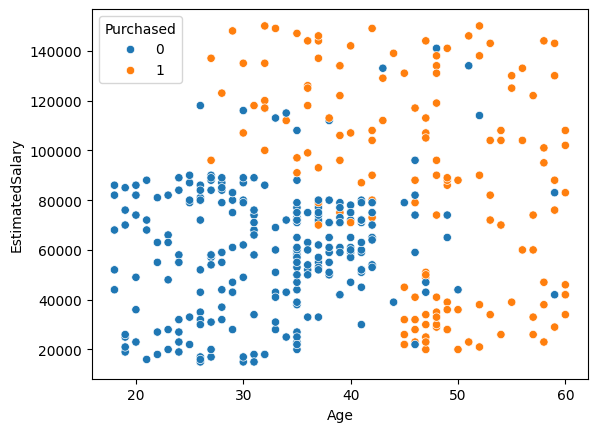

In [21]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [3]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
dataset.shape

(400, 3)

In [4]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()
sc.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [7]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [18]:
x_train.shape

(320, 2)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
dt.score(x_test,y_test)*100

83.75

In [20]:
dt1.score(x_test,y_test)*100

83.75

In [13]:
dt.predict([[19,19000]]) # its give wrong prediction

C:\Users\Ramay Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

C:\Users\Ramay Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


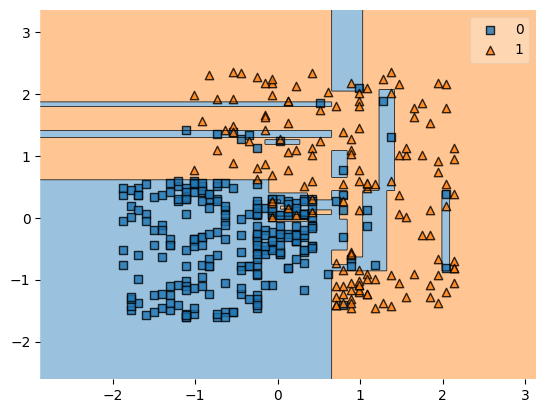

In [26]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()


In [14]:
from sklearn.tree import plot_tree

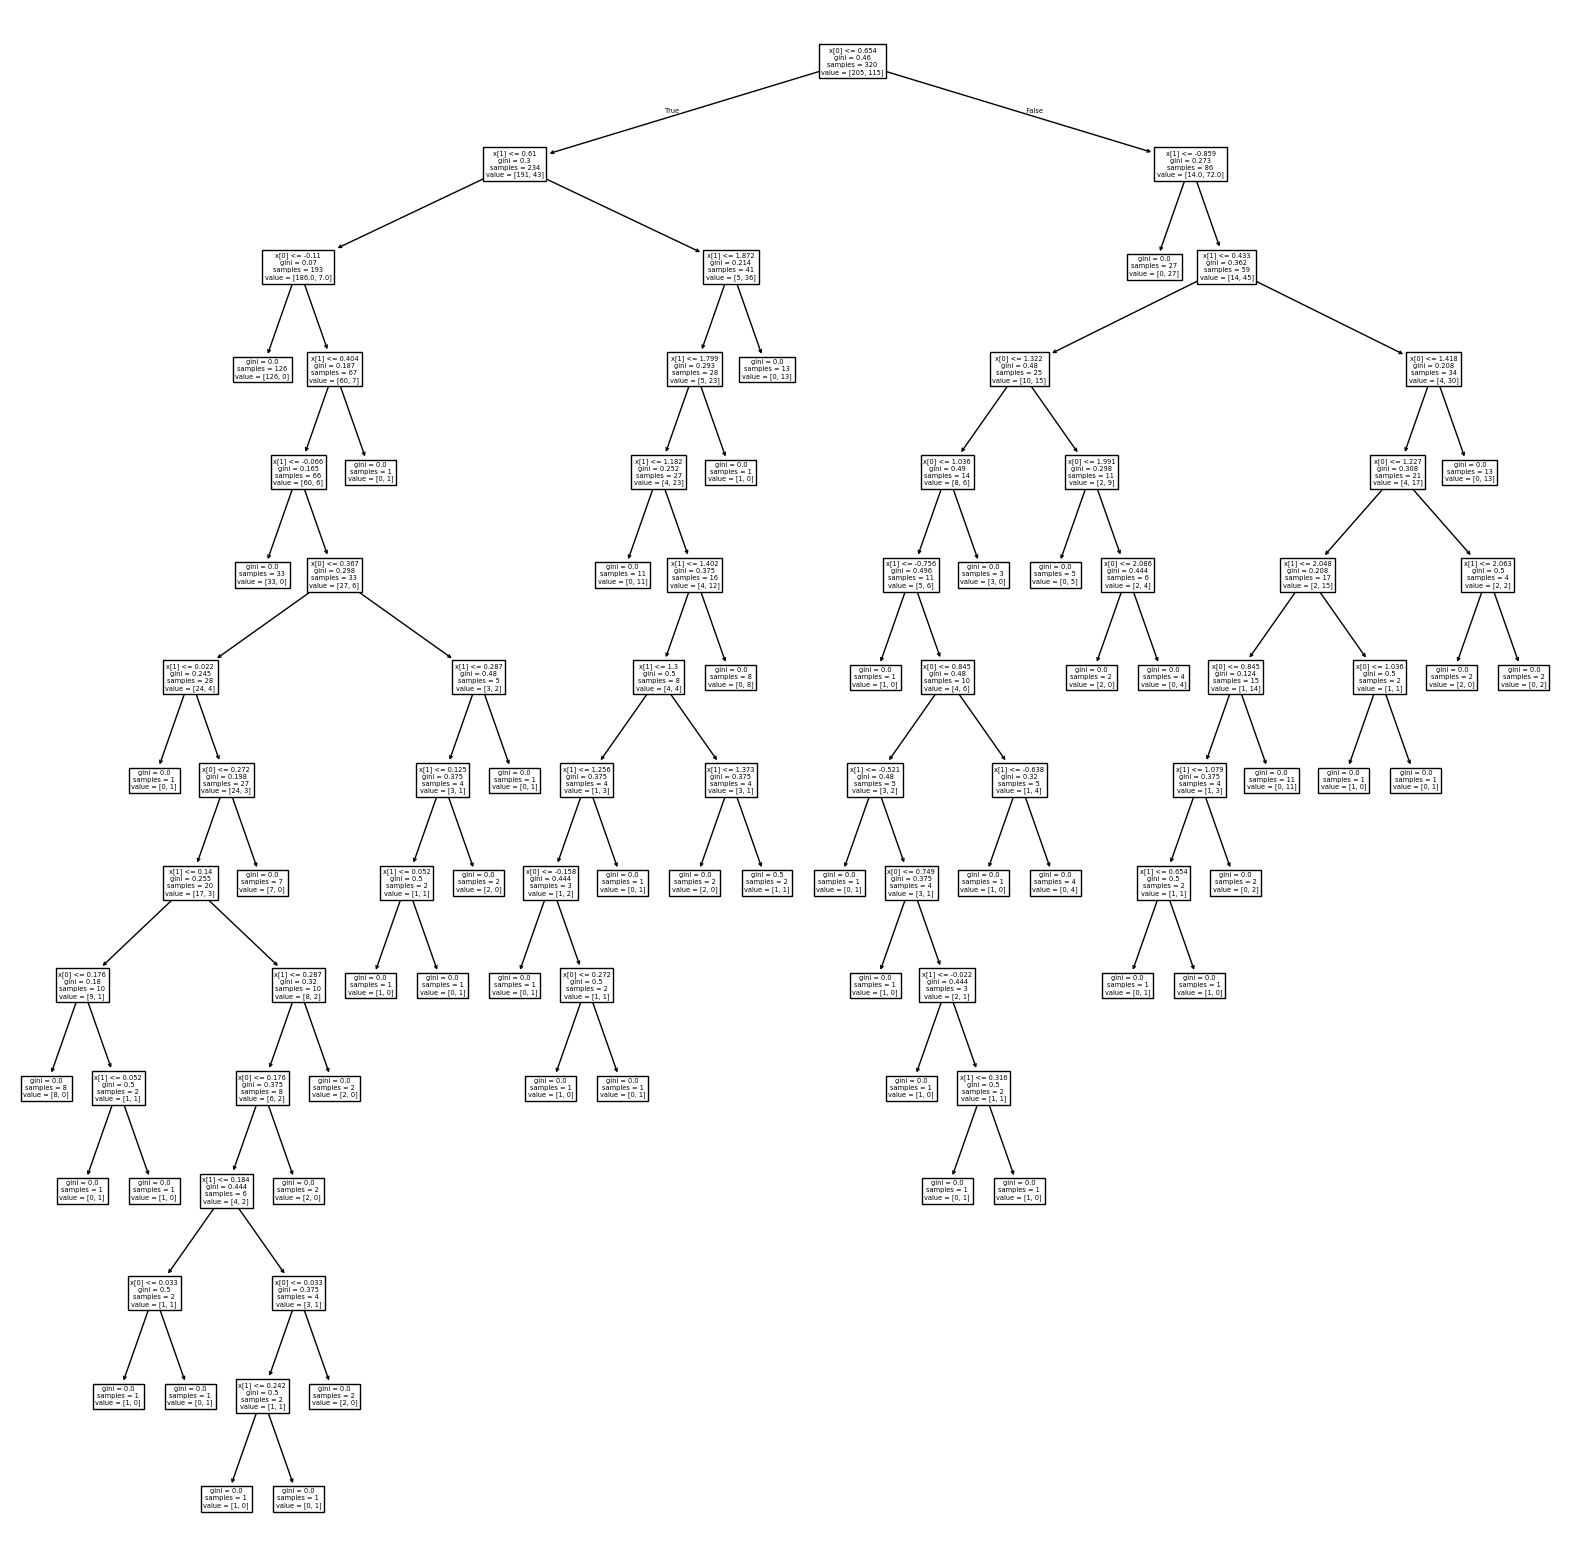

In [16]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()